In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

Here we have 50000 traing images and 10000t test images. For our classification problem we can use 1D array instead 2D target data. So we will convert both train and test target data into 1D

In [8]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# lets check the shape of y_train now
y_train.shape

(50000,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] # these are the classes we have

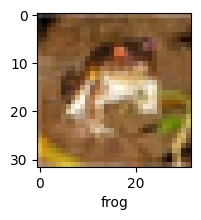

In [13]:
# lets plot some images

def plot_images(X, y, idx):
  plt.figure(figsize = (8,2))
  plt.imshow(X[idx])
  plt.xlabel(classes[y[idx]])

plot_images(X_train, y_train, 0)

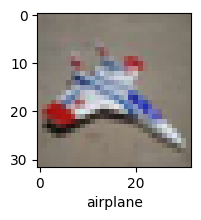

In [14]:
plot_images(X_train, y_train, 30)

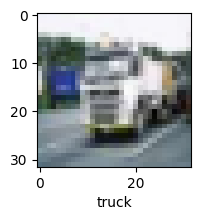

In [15]:
plot_images(X_train, y_train, 1000)

In [16]:
# Let's normalize the the data
X_train = X_train/255
X_test = X_test/255

In [17]:
from warnings import filters
# Building cnn model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [18]:
# compiling cnn model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [19]:
# fiting the cnn model
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5018 - accuracy: 0.4589
Epoch 2/20
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1885 - accuracy: 0.5804
Epoch 3/20
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0654 - accuracy: 0.6287
Epoch 4/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9884 - accuracy: 0.6547
Epoch 5/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9297 - accuracy: 0.6749
Epoch 6/20
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8789 - accuracy: 0.6938
Epoch 7/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8343 - accuracy: 0.7076
Epoch 8/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7995 - accuracy: 0.7213
Epoch 9/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7620 - accuracy: 0.7330
Epoch 10/20
1563/1563 [==============================] - 45s 29m

In [20]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0623 - accuracy: 0.6808


[1.0622520446777344, 0.6808000206947327]

In [25]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 3s 9ms/step


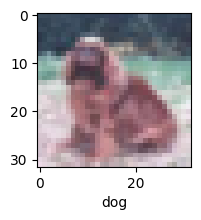

In [30]:
plot_images(X_test, y_test,101)

In [31]:
classes[y_classes[101]]

'dog'